# ===============================
# Exploratory Data Analysis - Titanic
# ===============================

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv("titanic.csv")

In [3]:
# Basic overview
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [7]:
# Missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Fill missing Age
df["Age"].fillna(df["Age"].mean(), inplace=True)

/tmp/ipykernel_26445/4221594543.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df["Age"].fillna(df["Age"].mean(), inplace=True)


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [4]:

# Drop Cabin
df.drop("Cabin", axis=1, inplace=True)

In [5]:
# NumPy analysis
ages = df["Age"].values
print("Mean Age:", np.mean(ages))
print("Median Age:", np.median(ages))
print("Std Age:", np.std(ages))

Mean Age: nan
Median Age: nan
Std Age: nan


In [6]:
# Group analysis
print(df.groupby("Sex")["Survived"].mean())
print(df.groupby("Pclass")["Survived"].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


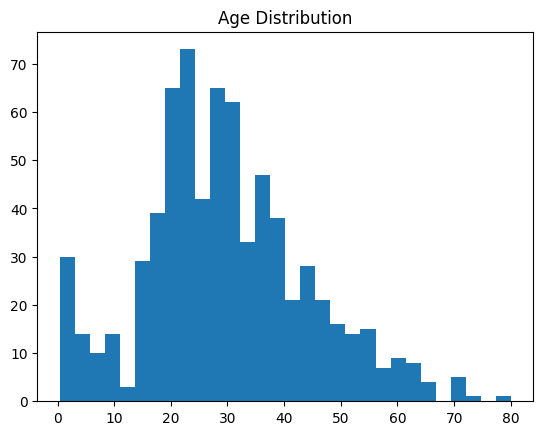

In [7]:
# Visualization
plt.hist(df["Age"], bins=30)
plt.title("Age Distribution")
plt.show()

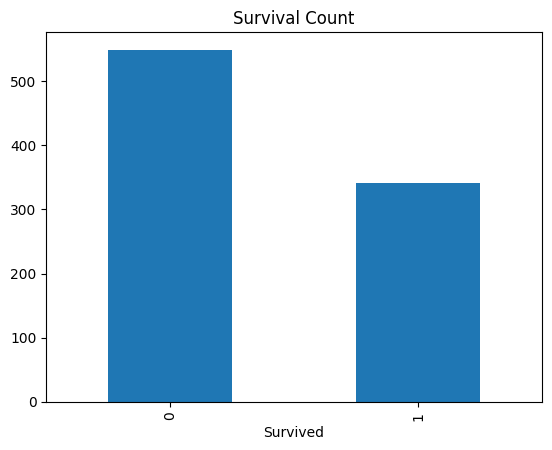

In [8]:
df["Survived"].value_counts().plot(kind="bar")
plt.title("Survival Count")
plt.show()

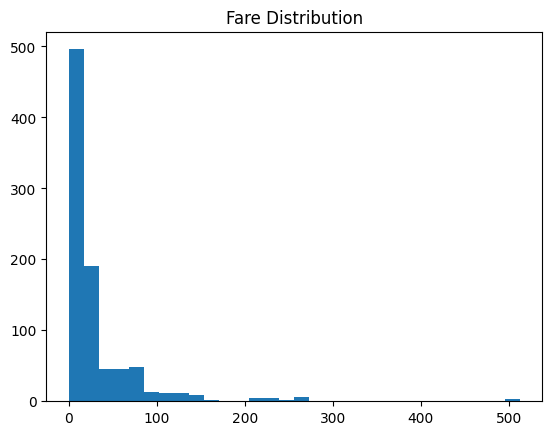

In [9]:

plt.hist(df["Fare"], bins=30)
plt.title("Fare Distribution")
plt.show()

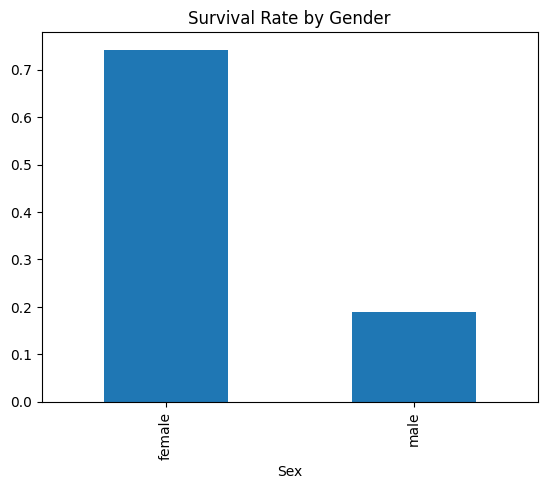

In [15]:
df.groupby("Sex")["Survived"].mean().plot(kind="bar")
plt.title("Survival Rate by Gender")
plt.show()

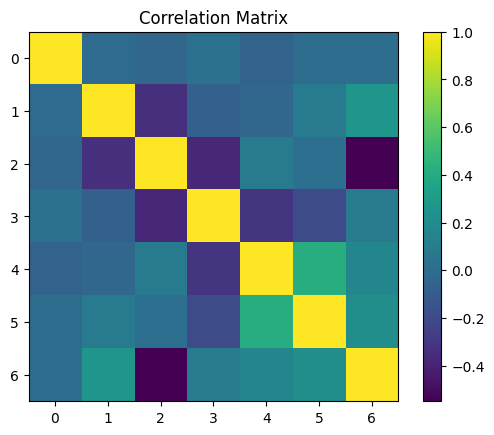

In [16]:
# Correlation
corr = df.corr(numeric_only=True)
plt.imshow(corr)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()